In [33]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split as ts
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl  
import matplotlib.pyplot as plt
import os
plt.style.use('science')
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
plt.style.use(['science','ieee'])



In [ ]:
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
re = clf.fit(X, y)

In [35]:
df = pd.read_csv('final_train_v4.csv')

In [ ]:
df.head(10)

In [36]:
labels = df['label'].values

In [37]:
features = df.drop(['label', 'Unnamed: 0'], axis=1)

In [41]:
feature_arr = features.values

In [50]:
X_train,X_test,y_train,y_test = ts(feature_arr, labels, test_size=0.3)

In [43]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [51]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [27]:
score_linear = clf.score(X_test,y_test)

In [28]:
score_linear

0.9943820224719101

In [52]:
from sklearn import metrics
preds = clf.predict(X_test)
targs = y_test 
print("accuracy: ", metrics.accuracy_score(targs, preds))
print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.9831460674157303
precision:  0.9877300613496932
recall:  0.9938271604938271
f1:  0.9907692307692307
area under curve (auc):  0.9344135802469136


In [64]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='svm(auc= %.2f)'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')


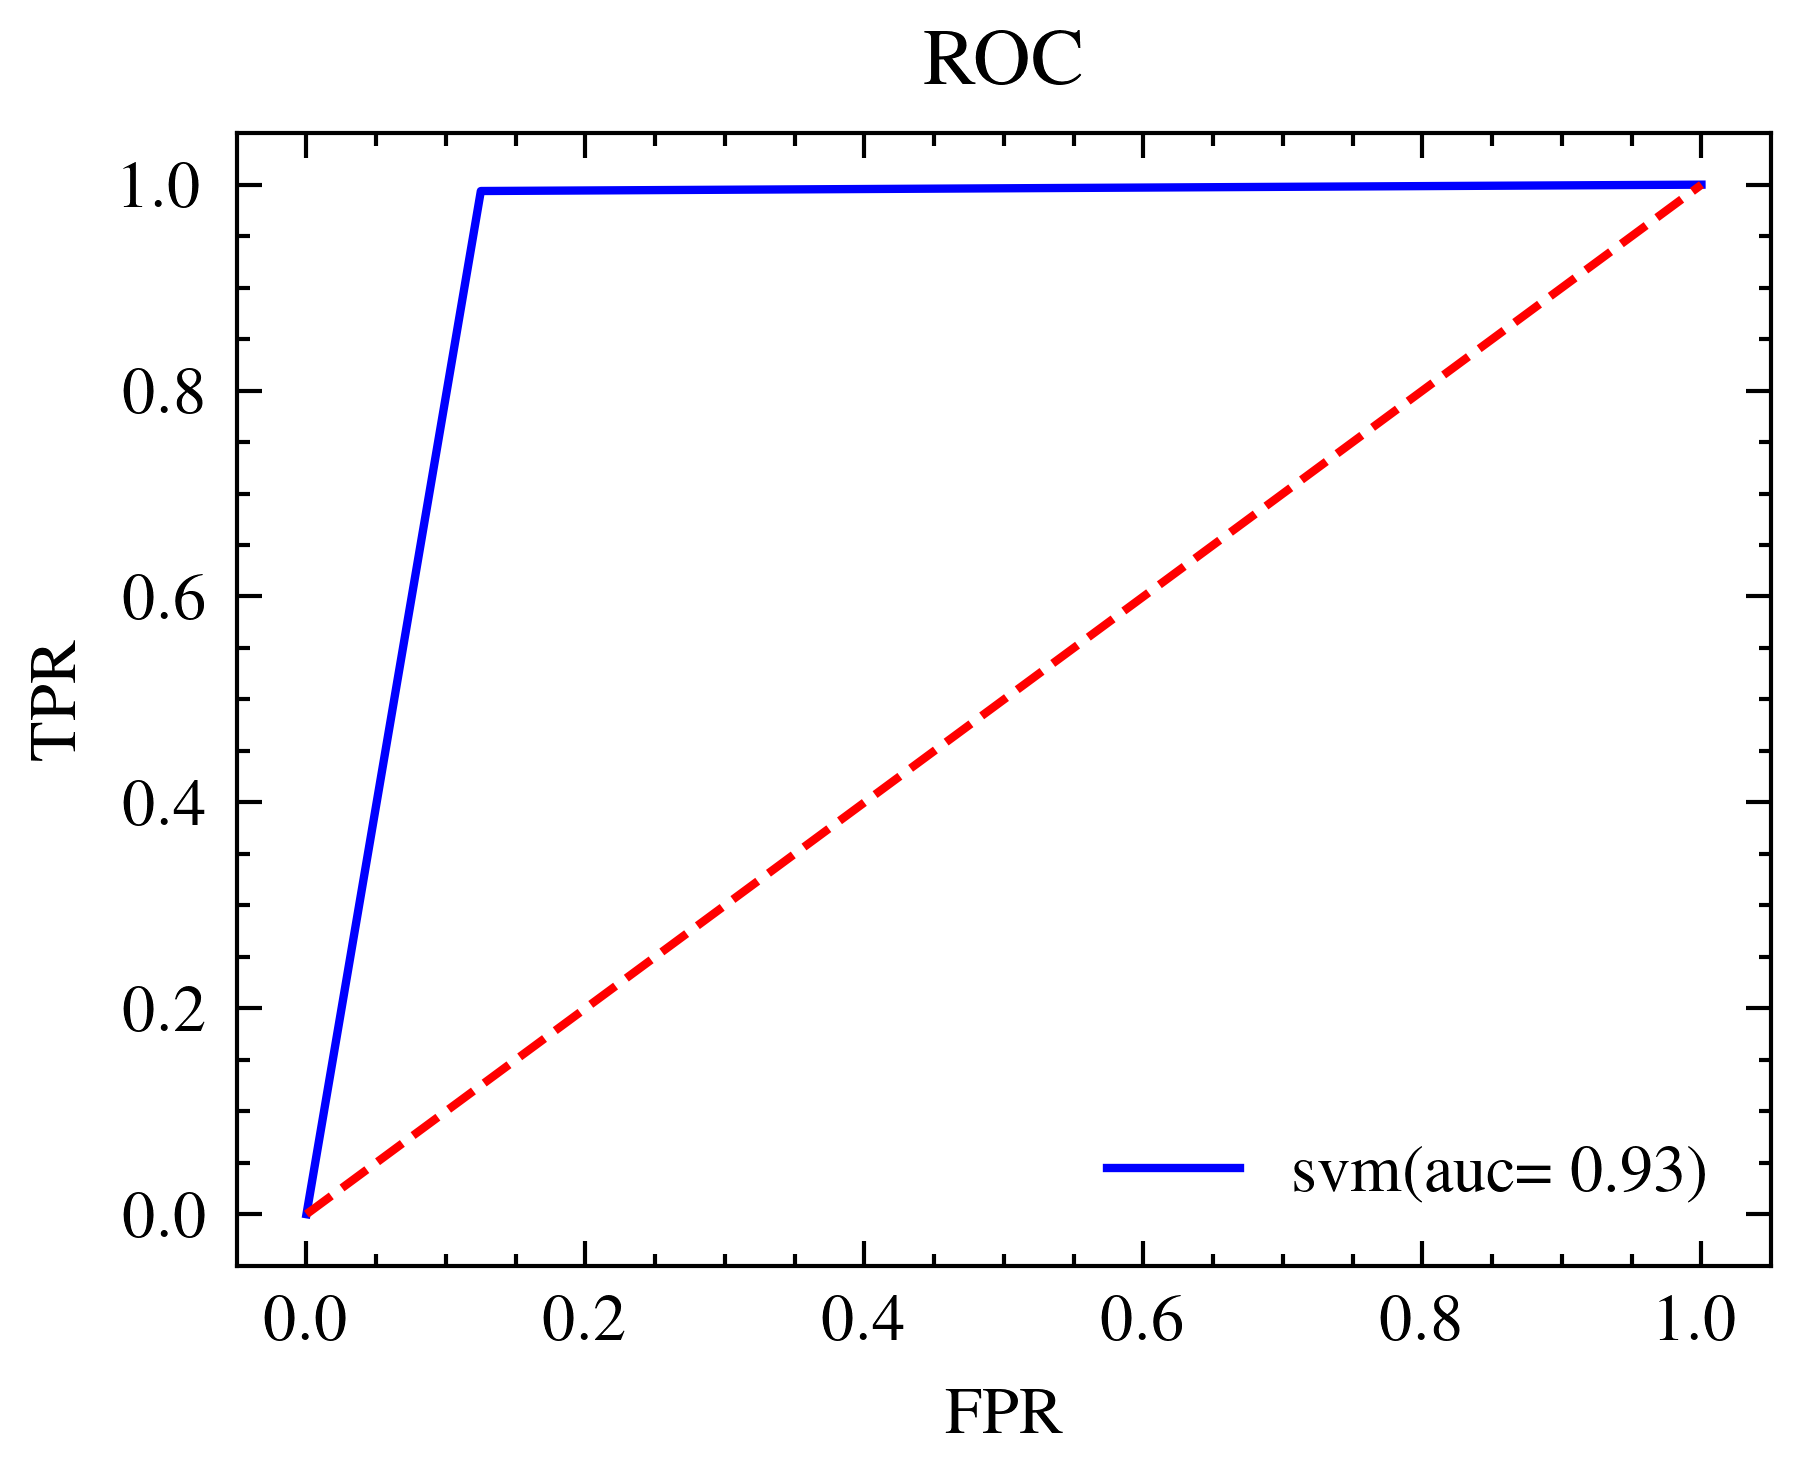

In [65]:
plot_roc(targs, preds)

In [31]:
preds = clf.predict(X_train)
targs = y_train 
plot_roc(targs, preds)

NameError: name 'plot_roc' is not defined

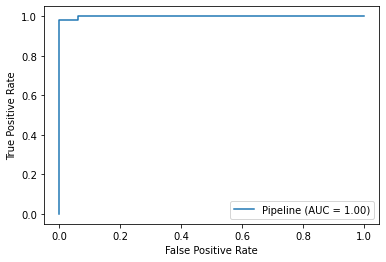

In [17]:
metrics.plot_roc_curve(clf, X_test, y_test)

In [54]:
false_positive_rate

NameError: name 'false_positive_rate' is not defined

In [55]:
 false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)

NameError: name 'predict_prob' is not defined